En en una escuela de 1000 alumnos, se han evaluado literatura, matemática y biología, obteniéndose los siguientes resultados:
680 aprobaron literatura. Los datos de la evaluación de Literatura se registraron en un
diccionario:
Literatura = {"Romántica": 40, "Clásica": 118, "Fantástica": 50, "Moderna": 95,
 "Antigüa": 56, "Poesía": 131, "Cuento": 87, "Novela": 103}
320 aprobaron biología. Los datos de la evaluación de Biología se registraron en una tupla:
Biologia = (40, 50, 60, 75, 34, 61)
490 aprobaron matemática. Los datos de la evaluación de Matemática se registraron en una
lista:
Matematica = [34, 40, 61, 75, 87, 90, 103]
Responder:
- a. cuántos aprobaron biología matemática y literatura.
- b. cuántos aprobaron sólo literatura y matemática?
- c. cuántos aprobaron sólo literatura?
- d. cuántos aprobaron solo biología?
- e. cuántos aprobaron sólo matemática?
- f. cuántos aprobaron 2 de los 3 exámenes?

#### A modo de sugerencia se indican los pasos ordenados para la solución:

- 1. declaraciones
- 2. definir funciones de control (opcional) y otras (necesarias)
- 3. convertir en set las estructuras
- 4. Resolver las preguntas y resto de opciones para armar el gráfico
- 5. Definir diagrama de Venn, gráfico y respuestas.

In [257]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

In [2]:
literatura = {"Romántica": 40, "Clásica": 118, "Fantástica": 50, "Moderna": 95, "Antigüa": 56, "Poesía": 131, "Cuento": 87, "Novela": 103}
biologia = (40, 50, 60, 75, 34, 61) 
matematica = [34, 40, 61, 75, 87, 90, 103]

ninguno = 0
universal = 1490

#### Controlo los totales de las materias:
- Literatura: 680
- Biología: 320
- Matemática: 490

In [9]:
def get_total(iterable):
    total = 0
    if type(iterable) is dict:
        iterable = [x for x in iterable.values()]
    for element in iterable:
            total += element
    return total

In [6]:
def to_set(iterable):
    if type(iterable) is dict:
        iterable = set([x for x in iterable.values()])
    else:
        iterable = set(iterable)
    return iterable

In [261]:
total_literatura = get_total(literatura)
print(f'Total Literatura: {total_literatura}')

Total Literatura: 680


In [262]:
total_biologia = get_total(biologia)
print(f'Total Biología: {total_biologia}')

Total Biología: 320


In [263]:
total_matematica = get_total(matematica)
print(f'Total Matemática: {total_matematica}')

Total Matemática: 490


#### Convierto a set las estructuras

In [7]:
literatura = to_set(literatura)
biologia = to_set(biologia)
matematica = to_set(matematica)

In [8]:
sum(biologia)

320

#### Respondo las preguntas

In [265]:
matematica_y_literatura_y_biologia = literatura & biologia & matematica
print(f'{get_total(matematica_y_literatura_y_biologia)} aprobaron biología matemática y literatura')

40 aprobaron biología matemática y literatura


In [296]:
literatura_y_matematica = (literatura & matematica) - biologia
print(f'{get_total(literatura_y_matematica)} aprobaron literatura y matemática')

190 aprobaron literatura y matemática


In [297]:
literatura_y_biologia = (literatura & biologia) - matematica
print(f'{get_total(literatura_y_biologia)} aprobaron literatura y biología')

50 aprobaron literatura y biología


In [298]:
matematica_y_biologia = (matematica & biologia) - literatura
print(f'{get_total(matematica_y_biologia)} aprobaron matemática y biología')

170 aprobaron matemática y biología


In [269]:
solo_literatura = (literatura - matematica) & (literatura - biologia)
print(f'{get_total(solo_literatura)} aprobaron solo literatura')

400 aprobaron solo literatura


In [270]:
solo_biologia = (biologia - matematica) & (biologia - literatura)
print(f'{get_total(solo_biologia)} aprobaron solo biología')

60 aprobaron solo biología


In [271]:
solo_matematica = (matematica - literatura) & (matematica - biologia)
print(f'{get_total(solo_matematica)} aprobaron solo matemática')

90 aprobaron solo matemática


In [272]:
dos_de_tres = (matematica & literatura) | (matematica & biologia) | (biologia & literatura)
print(f'{get_total(dos_de_tres)} aprobaron 2 de 3 exámenes')

450 aprobaron 2 de 3 exámenes


#### Armado del gráfico

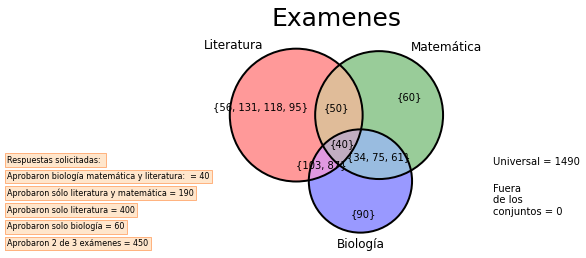

In [305]:
#renombro algunas variables
l = solo_literatura
b = solo_biologia
m = solo_matematica
lb = literatura_y_biologia
mb = matematica_y_biologia
lm = literatura_y_matematica
mlb = matematica_y_literatura_y_biologia
# preparamos la ventana del gráfico
plt.figure('Primer parcial 7/5/2020')

# dibujo los diagramas
diagram = venn3((total_literatura, total_matematica,get_total(lm), total_biologia,get_total(lb), get_total(mb), get_total(mlb)),
                set_labels=("Literatura", "Matemática", "Biología"))

# establecemos el tamaño de la fuente
for subset in ("111", "110", "101", "100", "011", "010", "001"):
    diagram.get_label_by_id(subset).set_fontsize(10)

# transferimos los resultados de las operaciones
diagram.get_label_by_id('100').set_text(l)
diagram.get_label_by_id('010').set_text(b)
diagram.get_label_by_id('001').set_text(m)
diagram.get_label_by_id('110').set_text(lb)
diagram.get_label_by_id('011').set_text(mb)
diagram.get_label_by_id('101').set_text(lm)
diagram.get_label_by_id('111').set_text(mlb)

# marcamos los contornos
venn3_circles(subsets=(total_literatura, total_matematica,get_total(lm),total_biologia,get_total(lb),get_total(mb), get_total(mlb)))

# agregamos más datos aclaratorios al gráfico
plt.text(0.9, -0.2,      # Texto y cantidad universal
         f"Universal = {universal}",
         size=10)

plt.text(0.90, -0.5,      # Texto fuera del conjunto
         f"Fuera\nde los\nconjuntos = {ninguno}",
         size=10)

# Respondemos las preguntas
plt.text(-2, -0.20,
         s="Respuestas solicitadas: ",
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-2, -0.30,
         s="Aprobaron biología matemática y literatura:  = " + str(get_total(mlb)),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-2, -0.40,
         s="Aprobaron sólo literatura y matemática = " + str(get_total(lm)),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-2, -0.50,
         s="Aprobaron solo literatura = " + str(get_total(l)),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-2, -0.60,
         s="Aprobaron solo biología = " + str(get_total(b)),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))


plt.text(-2, -0.70,
         s="Aprobaron solo matemática = " + str(get_total(m)),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))


plt.text(-2, -0.70,
         s="Aprobaron 2 de 3 exámenes = " + str(get_total(dos_de_tres)),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.axis('off')  # Recuadro
plt.title("Examenes",size=25)
plt.show()



- a. cuántos aprobaron biología matemática y literatura.
- b. cuántos aprobaron sólo literatura y matemática?
- c. cuántos aprobaron sólo literatura?
- d. cuántos aprobaron solo biología?
- e. cuántos aprobaron sólo matemática?
- f. cuántos aprobaron 2 de los 3 exámenes?

In [ ]:

biologia = sum(set(tupla_biologia))
print(f'Total Biologia: {biologia}')